In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<span style="font-family: Calibri, sans-serif; font-size: 35px;"># Reading data and storing it in a dataframe, giving names to column to access them easily.
</span>

In [41]:
file_path = 'C:\\Users\\MALAK\\Downloads\\magic04.data'
col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
data = pd.read_csv(file_path, names=col_names)
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


<span style="font-family: Calibri, sans-serif; font-size: 35px;"># Separate the gamma and hadron events based on the 'class' column to balance them.
</span>

In [42]:
gamma_events = data[data['class'] == 'g']
hadron_events = data[data['class'] == 'h']

<span style="font-family: Calibri, sans-serif; font-size: 35px;"># We count the number of elements belonging to the hadron class, and then we take a subset randomly from the gamma class that is equal in size to the number of elements in the hadron class.
</span>

In [43]:
hadron_count = len(hadron_events)
gamma_subset = gamma_events.sample(n=hadron_count, random_state=42)
print("Hadron count:",hadron_count)
print("Gamma count:",len(gamma_subset))

Hadron count: 6688
Gamma count: 6688


<span style="font-family: Calibri, sans-serif; font-size: 35px;"> # Create a balanced dataset by concatenating the gamma subset with hadron events the shuffling the data to ensure randomness.
</span>

In [44]:
balanced_data = pd.concat([gamma_subset, hadron_events])
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,16.2152,13.0743,2.4553,0.5431,0.3064,-10.3789,-13.1290,-0.1040,45.8852,185.6668,h
1,13.1500,10.9523,2.1477,0.7687,0.3950,-14.8886,2.6711,11.8531,28.5530,192.1400,g
2,126.0560,35.5809,3.5832,0.2854,0.1441,-30.9713,-139.7062,-33.4830,16.0535,324.4922,h
3,29.5490,14.1175,2.3692,0.3590,0.1902,37.1775,19.8095,-8.8034,0.9098,145.2470,g
4,69.2540,34.3016,3.1916,0.1173,0.1132,-30.2818,73.8184,21.3775,24.9091,279.9318,h
...,...,...,...,...,...,...,...,...,...,...,...
13371,34.7228,13.3626,2.6191,0.4639,0.2368,-43.1927,13.5598,-5.3328,42.6660,130.7520,h
13372,23.8603,14.8311,2.4224,0.5104,0.2703,-9.5178,-12.7220,12.4322,0.5570,98.4508,g
13373,40.9787,17.3368,2.8582,0.3410,0.1823,38.1097,39.5081,-9.6327,16.1810,148.8410,g
13374,23.8026,10.1636,2.2625,0.5628,0.3087,32.1961,-16.3031,-9.6851,20.3915,108.5820,g


<span style="font-family: Calibri, sans-serif; font-size: 35px;"> # Spliting data 70% for training, 15% for testing and 15% for validation
</span>

In [45]:
training_set, remaining_data = train_test_split(balanced_data, test_size=0.3, random_state=42)
validation_set, test_set = train_test_split(remaining_data, test_size=0.5, random_state=42)
print("Training set:",len(training_set))
print("Validation set:",len(validation_set))
print("Test set:",len(test_set))

Training set: 9363
Validation set: 2006
Test set: 2007


<span style="font-family: Calibri, sans-serif; font-size: 35px;"># Define features(x) and label(y) which is our target variable
</span>

In [46]:
X_train = training_set.drop(columns=['class'])
y_train = training_set['class']

X_val = validation_set.drop(columns=['class'])
y_val = validation_set['class']

X_test = test_set.drop(columns=['class'])
y_test = test_set['class']

<span style="font-family: Calibri, sans-serif; font-size: 35px;"># Initializing k_values to be used in a loop to find best k value, other initialized variables will be used to store the values of this k.
</span>

In [47]:
k_values = range(1, 21)
accuracy_scores = []
best_k = 0
true_values = 0
predicted_values = 0
max_accuracy = 0
min_error = 100000

<span style="font-family: Calibri, sans-serif; font-size: 35px;"># This loop iterates on different k values to find the best one, it initialize a k-NN classifier with the current k which is equal to one, train the classifier on the training data,
predict the classes for validation data, calculate accuracy score and error for the current k value then print the evaluation matrix for this k and so on till the end of the list.
</span>

In [48]:
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_val_pred = knn_classifier.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    error = 1 - accuracy
    # this condition is to compare between different k values and find the best one according to highest accuracy.
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_k = k
        true_values = y_val.values
        predicted_values = y_val_pred
        min_error = error
    accuracy_scores.append(accuracy)
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    print(f"k = {k}:")
    print("Accuracy:", accuracy)
    print("Error:", error)
    print("Classification Report:")
    print(classification_report(y_val, y_val_pred))
    print("Confusion Matrix:")
    print(conf_matrix)

k = 1:
Accuracy: 0.7298105682951147
Error: 0.2701894317048853
Classification Report:
              precision    recall  f1-score   support

           g       0.71      0.78      0.74      1002
           h       0.76      0.68      0.71      1004

    accuracy                           0.73      2006
   macro avg       0.73      0.73      0.73      2006
weighted avg       0.73      0.73      0.73      2006

Confusion Matrix:
[[785 217]
 [325 679]]
k = 2:
Accuracy: 0.7223330009970089
Error: 0.2776669990029911
Classification Report:
              precision    recall  f1-score   support

           g       0.66      0.91      0.77      1002
           h       0.86      0.54      0.66      1004

    accuracy                           0.72      2006
   macro avg       0.76      0.72      0.71      2006
weighted avg       0.76      0.72      0.71      2006

Confusion Matrix:
[[911  91]
 [466 538]]
k = 3:
Accuracy: 0.7522432701894317
Error: 0.2477567298105683
Classification Report:
         

<span style="font-family: Calibri, sans-serif; font-size: 35px;"># Print evaluation results including the best value of k, maximum accuracy achieved, minimum error, true labels, and predicted labels for the best k.
</span>

In [49]:
print("Best k:", best_k)
print("Maximum accuracy:", max_accuracy)
print("Minimum error:",min_error)
print("True labels for best k:")
print(true_values)
print("Predicted labels for best k:")
print(predicted_values)

Best k: 5
Maximum accuracy: 0.7666999002991027
Minimum error: 0.23330009970089727
True labels for best k:
['h' 'h' 'h' ... 'h' 'g' 'g']
Predicted labels for best k:
['h' 'h' 'g' ... 'h' 'g' 'g']


<span style="font-family: Calibri, sans-serif; font-size: 35px;"># Plotting accuracy scores against the number of neighbors (k) for k-NN classifier.
</span>

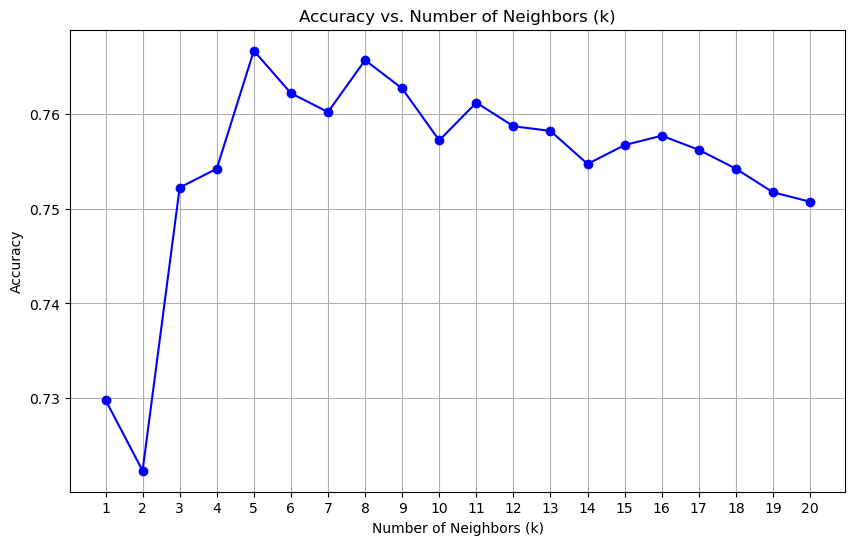

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 21, step=1))
plt.grid(True)
plt.show()